In [13]:
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt

# need to be able to do this with entire portfolio
stock = 'ZOM'

start = dt.datetime(2020, 1, 1)
data = web.get_data_yahoo(stock, start)


#10 and 20 day moving averages
data['10_MA'] = data['Adj Close'].rolling(10).mean()
data['20_MA'] = data['Adj Close'].rolling(20).mean()

data.dropna(inplace = True)


In [14]:
#MA Trade Calls
Trade_Buy = []
Trade_Sell = []

for i in range(len(data) - 1):
    if ((data['10_MA'].values[i] < data['20_MA'].values[i]) & (data['10_MA'].values[i+1] > data['20_MA'].values[i+1])):
        Trade_Buy.append(i)
    elif ((data['10_MA'].values[i] > data['20_MA'].values[i]) & (data['10_MA'].values[i+1] < data['20_MA'].values[i+1])):
        Trade_Sell.append(i)

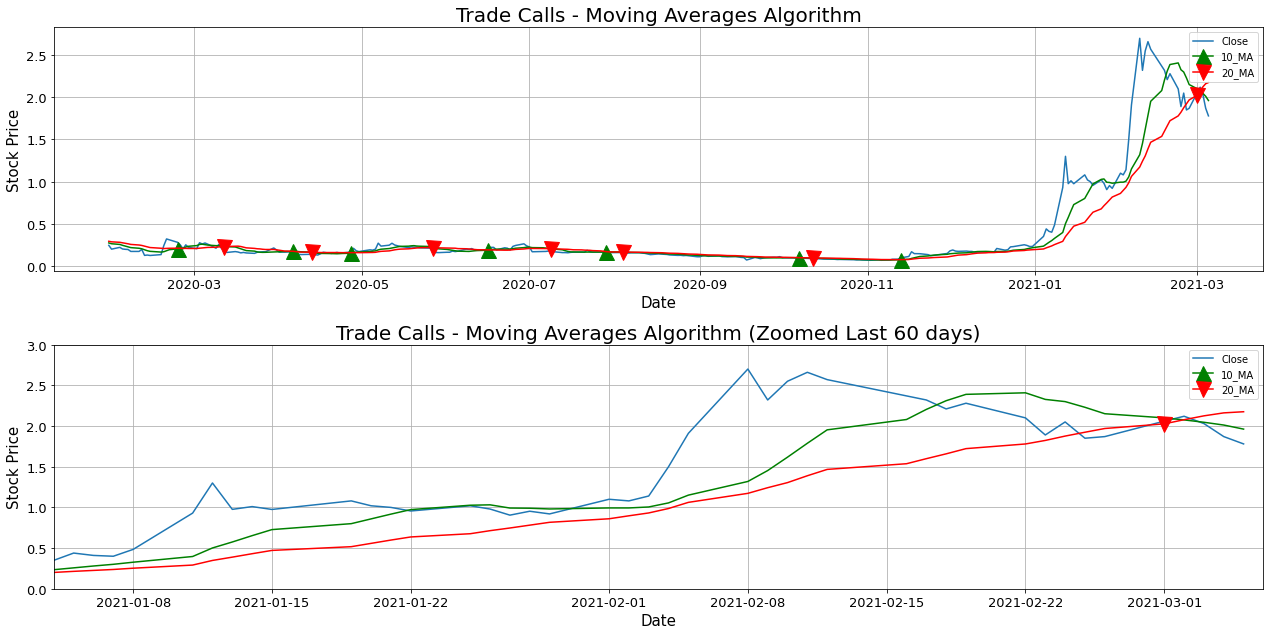

In [15]:
from datetime import timedelta
fig, ax = plt.subplots(2, 1, figsize = (20, 10))

ax[0].plot(data.index, data['Adj Close'])
ax[0].plot(data.index, data['10_MA'],'-^', markevery=Trade_Buy, ms=15, color = 'g')
ax[0].plot(data.index, data['20_MA'],'-v', markevery=Trade_Sell, ms=15, color = 'r')

ax[0].set_xlabel('Date', fontsize = 15)
ax[0].set_ylabel('Stock Price', fontsize = 15)
ax[0].tick_params(axis = 'x', labelsize = 13)
ax[0].tick_params(axis = 'y', labelsize = 13)
ax[0].set_title('Trade Calls - Moving Averages Algorithm', fontdict = {'size': 20})
ax[0].legend(['Close','10_MA','20_MA'])
ax[0].grid()

ax[1].plot(data.index, data['Adj Close'])
ax[1].plot(data.index, data['10_MA'],'-^', markevery=Trade_Buy, ms=15, color = 'g')
ax[1].plot(data.index, data['20_MA'],'-v', markevery=Trade_Sell, ms=15, color = 'r')
ax[1].set_xlabel('Date', fontsize = 15)
ax[1].set_ylabel('Stock Price', fontsize = 15)
ax[1].tick_params(axis = 'x', labelsize = 13)
ax[1].tick_params(axis = 'y', labelsize = 13)
ax[1].set_title('Trade Calls - Moving Averages Algorithm (Zoomed Last 60 days)', fontdict = {'size': 20})
ax[1].legend(['Close','10_MA','20_MA'])
ax[1].set_xlim(data.index[-1] - timedelta(60), data.index[-1] + timedelta(1))
ax[1].set_ylim(0, 3)
ax[1].grid()

plt.subplots_adjust(top = 0.92, left = 0.09, right = 0.93, bottom = 0.14, hspace = 0.3)
plt.show()

NameError: name 'final_news' is not defined

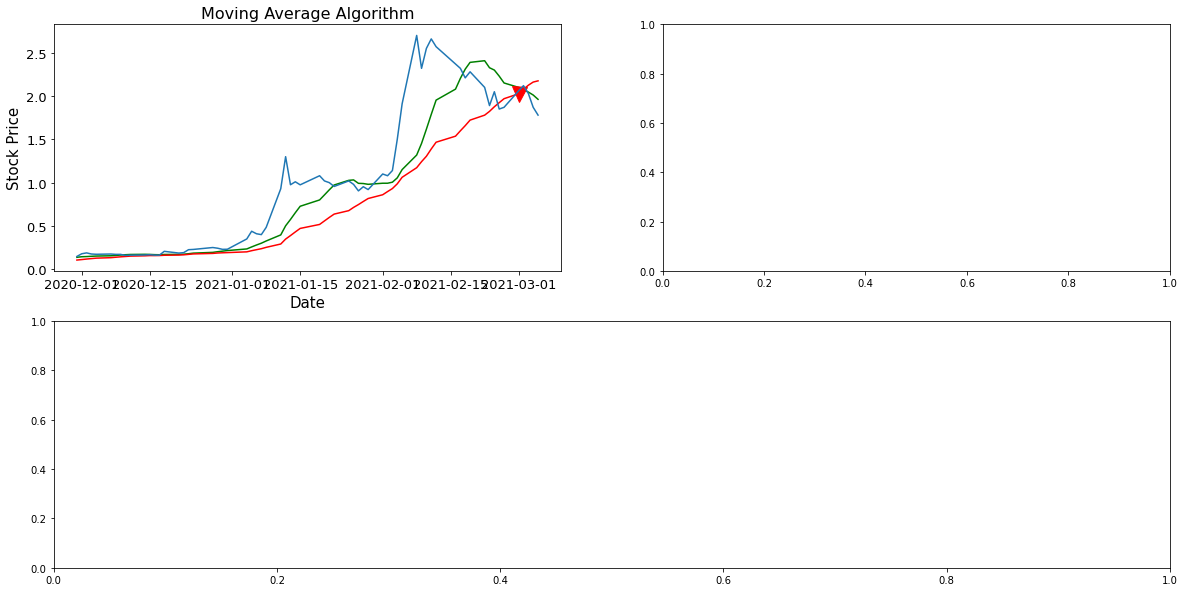

In [10]:
import matplotlib.ticker as ticker

plt.figure(figsize = (20, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan = 1, colspan = 1)
ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan = 1, colspan = 1)
ax3 = plt.subplot2grid((2, 2), (1, 0), rowspan = 1, colspan = 2)

ax1.plot(data.index, data['10_MA'],'-^', markevery=Trade_Buy, ms=15, color='green')
ax1.plot(data.index, data['20_MA'],'-v', markevery=Trade_Sell, ms=15, color='red')
ax1.plot(data.index, data['Adj Close'])
ax1.set_xlabel('Date',fontsize = 15)
ax1.set_ylabel('Stock Price', fontsize = 15)
ax1.tick_params(axis = 'x', labelsize = 13)
ax1.tick_params(axis = 'y', labelsize = 13)
ax1.set_title('Moving Average Algorithm', fontsize =  16)
ax1.set_xlim(final_news.Date[0] - timedelta(20), data.index[-1] + timedelta(1))
ax1.set_ylim(200, 550)
ax1.legend(['10_MA','20_MA','Close'])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.grid()

ax2.plot(data.index, data['Adj Close'],'-^', markevery=vader_buy, ms=15, color='green')
ax2.plot(data.index, data['Adj Close'],'-v', markevery=vader_sell, ms=15, color='red')
ax2.plot(data.index, data['Adj Close'])
ax2.set_xlabel('Date',fontsize = 15)
ax2.set_ylabel('Stock Price', fontsize = 15)
ax2.set_title('Vader Algorithm', fontsize = 16)
ax2.legend(['Buy','Sell','Close'])
ax2.set_xlim(final_news.Date[0] - timedelta(5), data.index[-1] + timedelta(1))
ax2.set_ylim(200, 550)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.grid()

#Combined
final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))

ax3.plot(data.index, data['10_MA'], color='green')
ax3.plot(data.index, data['20_MA'], color='red')
ax3.plot(data.index, data['Adj Close'],'-^', markevery=final_buy, ms=15, color='green')
ax3.plot(data.index, data['Adj Close'],'-v', markevery=final_sell, ms=15, color='red')
ax3.plot(data.index, data['Adj Close'])
ax3.set_xlabel('Date',fontsize = 15)
ax3.set_ylabel('Stock Price', fontsize = 15)
ax3.set_title('Combined Algorithms', fontsize = 16)
ax3.legend(['10_MA','20_MA','Buy','Sell','Close'])
ax3.set_ylim(200, 550)
ax3.set_xlim(final_news.Date[0] - timedelta(10), data.index[-1] + timedelta(1))
ax3.grid()

plt.subplots_adjust(top = 0.94, bottom = 0.09, right = 0.94, left = 0.07, hspace = 0.25, wspace = 0.15)
plt.show()